Konrad Szwed projekt 0.4

Bibliografia:<br/>
https://dzone.com/articles/image-data-analysis-using-numpy-amp-opencv <br/>
https://plot.ly/matplotlib/



In [1]:
import glob
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import csv
import timeit
from scipy.stats import norm


In [47]:
#Wymiary wykresów w matplotlib
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
#ŚCIEŻKI DOSTĘPU
#WPISZ SCIEZKE DO FOLDERU W KTORYM ZBADAMY PLIKI GRAFICZNE (zostaw to r''' i ''' na końcu)
#domyślnie: \Users\rooni\Desktop\projekt_analiza_obrazu\baza
#########################################################################
#user_path=r'''C:\Users\rooni\Desktop\PHOTOSHOP'''
#user_path=r'''D:\Lelz'''
user_path=r'''\Users\rooni\Desktop\projekt_analiza_obrazu\baza'''
#########################################################################
stats_path=r'''C:\Users\rooni\Desktop\projekt_analiza_obrazu\stats'''
#stats_path=r'''C:\Users\KSzwed\repositories\projekt_analiza_obrazu\stats'''

In [15]:
#sprawdzanie atrybutów funkcji
#print(timeit.__dict__)

In [16]:
import time

def timeit(method):
    """Mierzy czas wykonania funkcji"""
 
    def check_time(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        log(method.__name__, args, kw, ts, te)
        return result
 
    def log(name, args, kw, time_start, time_end):
        #msg = '%r (%r, %r) %2.10f sec' % (name, args, kw, time_end - time_start)
        msg = '%r %2.10f sec' % (name, time_end - time_start)
        print (msg)
 
    check_time.__name__ = method.__name__
    return check_time

In [17]:
#pobieranie jpg z folderu
@timeit
def pliki(user_path):
    path, dirs, files = next(os.walk(user_path))
    print("W folderze jest :", len(files) ,"plikow")
    count=len(files)
    files = [ fi for fi in files if fi.endswith(".jpg") or fi.endswith(".jpeg")]
    file_count = len(files)
    print("W tym :", file_count ,"plików jpg, jpeg")
    print("W tym :", count-file_count ,"innych plików")
    return(files, file_count)

<h2>Ilość plików w podanej ścieżce</h2>

In [18]:
files,file_count=pliki(user_path)

W folderze jest : 5001 plikow
W tym : 5000 plików jpg, jpeg
W tym : 1 innych plików
'pliki' 0.0219779015 sec


In [19]:
#test konkretnego pliku
get_ipython().run_line_magic('matplotlib', 'inline')
@timeit
def test_img(file):
    pic = imageio.imread(file)
    plt.figure(figsize = (15,15))
    plt.imshow(pic)

    print('Type of the image: ' , type(pic))
    print('Shape of the image: {}'.format(pic.shape))
    print(f'Image Hight: {pic.shape[0]} pixels')
    print(f'Image Width: {pic.shape[1]} pixels')
    print('Dimension of Image: {}'.format(pic.ndim))
    print('Image size: {}'.format(pic.size))
    print('Maximum RGB value in this image: {}'.format(pic.max()))
    print('Minimum RGB value in this image: {}'.format(pic.min()))
    try:
        print('Value of only R channel: {}'.format(pic[ 100, 50, 0]))
        print('Value of only G channel: {}'.format(pic[ 100, 50, 1]))
        print('Value of only B channel: {}'.format(pic[ 100, 50, 2]))
    except IndexError:
        print("RGB canals error")

In [20]:
#@timeit
def imgstats(file):
    pic = imageio.imread(file)
    img_stats=[]
    global i
    img_stats.append(i)
    img_stats.append(file)
    img_stats.append(type(pic))
    img_stats.append(pic.shape[0])
    img_stats.append(pic.shape[1])
    img_stats.append(pic.ndim)
    img_stats.append(pic.size)
    img_stats.append(pic.max())
    img_stats.append(pic.min())
    try:
        img_stats.append(pic[100, 50, 0])
        img_stats.append(pic[ 100, 50, 1])
        img_stats.append(pic[ 100, 50, 2])
    except IndexError:
        img_stats.append(0)
        img_stats.append(0)
        img_stats.append(0)
    return img_stats

In [21]:
Titles=['Index','File name','Type of the image','Image Height','Image Width','Dimension of Image','Image size','Maximum RGB','Minimum RGB','R channel','G channel','B channel','Baza wygenerowana przez Konrad Szwed dnia {} | Zawiera {} elementow'.format(datetime.datetime.today(),file_count)]

In [22]:
#test w razie problemow z konkretnym plikiem
#file=user_path+'\{}'.format(files[10])
#test_img(file)

In [37]:
#Sprawdzenie poprzedniego pliku ze statystykami
#path_oldstat='./stats/'
@timeit
def check_stats(stats_path):
    path_oldstat=stats_path
    if os.path.isfile(path_oldstat+'stats.csv') :
        if os.path.isfile(path_oldstat+'old_stats.csv') :    
            os.unlink(path_oldstat+'old_stats.csv')
        os.rename(path_oldstat+'stats.csv', path_oldstat+'old_stats.csv')
        print('Utworzono backup poprzedniej bazy danych w folderze {},pod nazwą {}'.format(path_oldstat, os.listdir(path_oldstat)))

  
#Tworzenie csv
@timeit
def make_csv_stats(stats_path, Titles, files, file_count):
    global i
    with open(stats_path+'\stats.csv', 'w') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',',
                                quotechar=' ', quoting=csv.QUOTE_MINIMAL)
        filewriter.writerow(Titles)
        #file_count ale do testow ustawcie mniejsza liczbe
        for i in range(file_count):
            file=user_path+'\{}'.format(files[i])
            filewriter.writerow(imgstats(file))

check_stats(stats_path)  
make_csv_stats(stats_path, Titles, files, file_count)


'check_stats' 0.0009987354 sec
'make_csv_stats' 75.7713449001 sec


In [40]:
print(files[0])
print(imgstats('baza\{}'.format(files[0])))

000000000139.jpg
[4999, 'baza\\000000000139.jpg', <class 'imageio.core.util.Array'>, 426, 640, 3, 817920, 239, 0, 169, 155, 108]


In [26]:
@timeit
def wyswietl(stats):
    return('Image Height:{:.2f}\n Image Width:{:.2f}\n Dimension of Image:{:.2f}\n Image size:{:.2f}Mb\n Maximum RGB:{:.2f}\n Minimum RGB:{:.2f}\n R channel:{:.2f}\n G channel:{:.2f}\n B channel:{:.2f}'.format(stats[0],stats[1],stats[2],stats[3]*pow(10,-6),stats[4],stats[5],stats[6],stats[7],stats[8]))

In [27]:
#tworzymy dane
@timeit
def make_data_stats_from_links(files):
    dane=[]
    for i in range(file_count):
        file=user_path+'\{}'.format(files[i])
        dane.append(imgstats(file))
    return dane

dane=make_data_stats_from_links(files)
#print(dane)

'make_data_stats_from_links' 109.7911820412 sec


<h2>Średnie statystyki wszystkich plików w podanej ścieżce</h2>

In [28]:
#Statystyki uśrednione
def make_avg_from_data(data):
    avg=[0,0,0,0,0,0,0,0,0]

    for i in range(0,len(dane)):
        for x in range(3,12):
            #print(dane[i][x])
            avg[x-3]+=dane[i][x]
    for i in range(0,len(avg)):
        avg[i]=avg[i]/len(dane)
    return avg

avg=make_avg_from_data(dane)
print("Wyniki średnie:")    
print(wyswietl(avg))

Wyniki średnie:
'wyswietl' 0.0000000000 sec
Image Height:483.54
 Image Width:573.75
 Dimension of Image:3.00
 Image size:0.82Mb
 Maximum RGB:254.42
 Minimum RGB:0.29
 R channel:119.90
 G channel:118.31
 B channel:110.99


wykres średnia z RGB channels


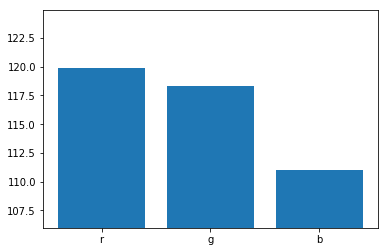

In [29]:
#wykresy

print("wykres średnia z RGB channels")
y = [avg[6],avg[7],avg[8]]
plt.bar(['r','g','b'],y)
plt.ylim(min(y)-5, max(y)+5)
plt.show()


<H2>Ilość wystąpień poszczególnych wartości RGB</H2>

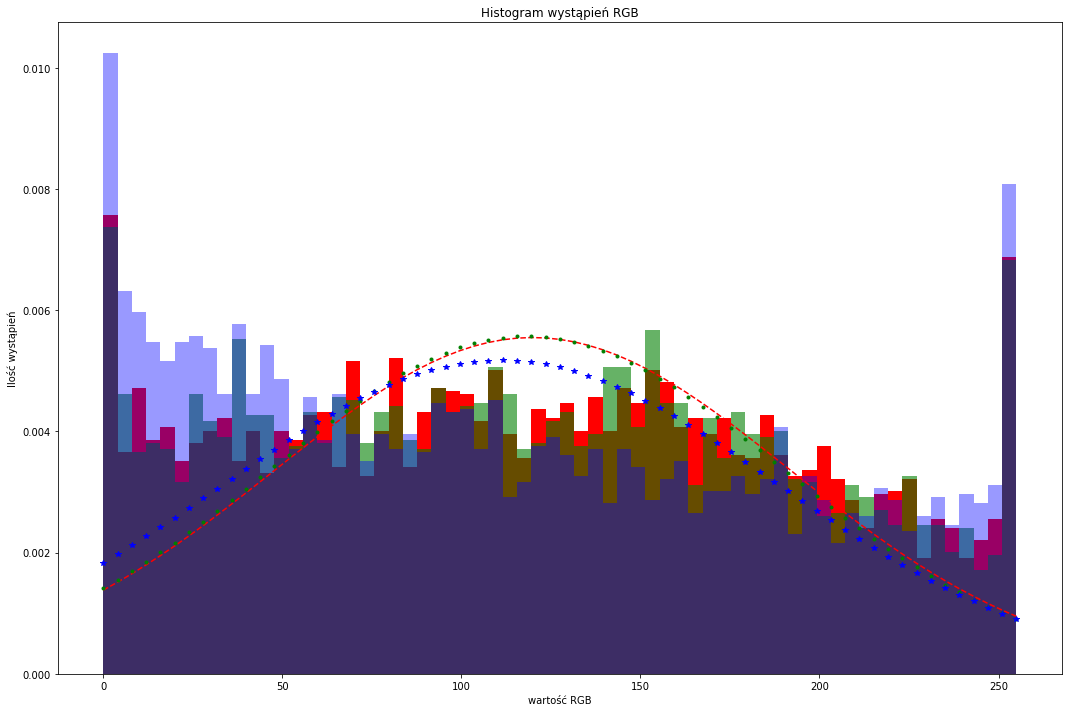

In [49]:
# create a figure and axis 
fig, ax = plt.subplots() 

t=[i for i in range(256)]
data1,data2,data3=[],[],[]
for i in range(0,len(dane)):
    data1.append(dane[i][9])
    data2.append(dane[i][10])
    data3.append(dane[i][11])

num_bins = 64 #ilosc slupkow    
# the histogram of the data
n, bins, patches = ax.hist(data1, num_bins, density=1, color='red',alpha = 1)
ax.hist(data2, num_bins, density=1, color='green',alpha = 0.6)
ax.hist(data3, num_bins, density=1, color='blue',alpha = 0.4)

# add a 'best fit' line red
(mu, sigma) = norm.fit(data1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', color="red")    

# add a 'best fit' line red
(mu, sigma) = norm.fit(data2)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '.', color="green")    

# add a 'best fit' line red
(mu, sigma) = norm.fit(data3)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '*', color="blue")    

ax.set_xlabel('wartość RGB')
ax.set_ylabel('Ilość wystąpień')
ax.set_title(r'Histogram wystąpień RGB')

#zapis grafu
plt.savefig('rgbavg.png')
plt.savefig('rgbavg.pdf')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()



Type of the image:  <class 'imageio.core.util.Array'>
Shape of the image: (478, 640, 3)
Image Hight: 478 pixels
Image Width: 640 pixels
Dimension of Image: 3
Image size: 917760
Maximum RGB value in this image: 255
Minimum RGB value in this image: 0
Value of only R channel: 59
Value of only G channel: 25
Value of only B channel: 0
'test_img' 0.0408899784 sec


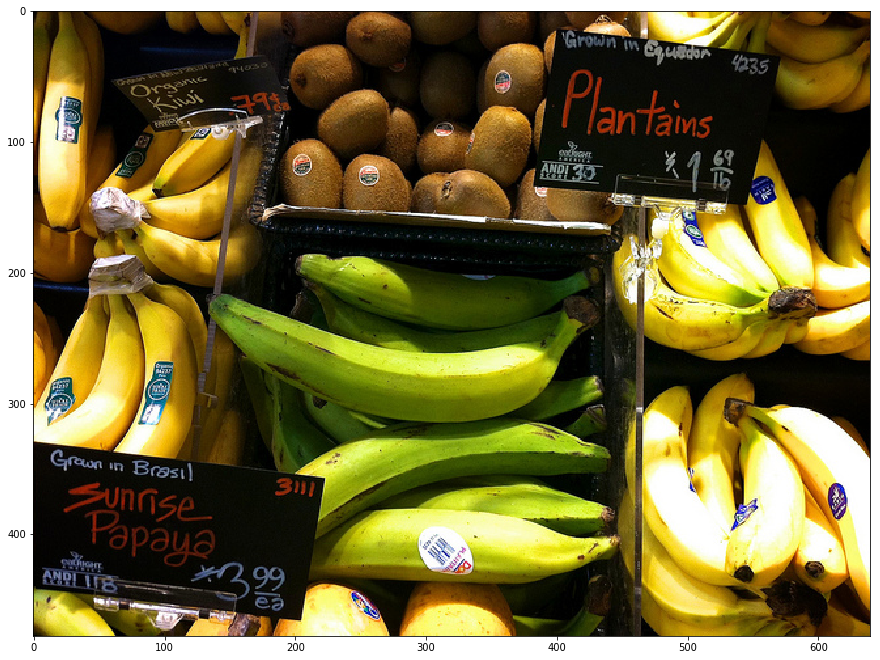

In [46]:
#teścik obrazka
length=len(files)-1
test=user_path+'\{}'.format(files[length])
test_img(test)